<a href="https://colab.research.google.com/github/Xavier-Milhet/Curriculum-Vitae/blob/master/SVC_%26_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
headers_col = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', \
               'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target']

In [3]:
df = pd.read_csv('adult.data', names=headers_col, index_col=False)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.duplicated().sum()

24

In [6]:
df.shape

(32561, 15)

In [7]:
df_clean = df.drop_duplicates()

In [8]:
df_clean.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [9]:
df_clean.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
continuous_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [19]:
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
sc.fit(df_clean[continuous_columns])
df_clean[continuous_columns] = sc.transform(df_clean[continuous_columns])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
df_clean.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,0.030390,State-gov,77516,Bachelors,1.134777,Never-married,Adm-clerical,Not-in-family,White,Male,0.148292,-0.216743,-0.035664,United-States,<=50K
1,0.836973,Self-emp-not-inc,83311,Bachelors,1.134777,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145975,-0.216743,-2.222483,United-States,<=50K
2,-0.042936,Private,215646,HS-grad,-0.420679,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145975,-0.216743,-0.035664,United-States,<=50K
3,1.056950,Private,234721,11th,-1.198407,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145975,-0.216743,-0.035664,United-States,<=50K
4,-0.776193,Private,338409,Bachelors,1.134777,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145975,-0.216743,-0.035664,Cuba,<=50K


In [15]:
df_clean['sex'] = df_clean['sex'].str.replace('Female', '0').str.replace('Male', '1').astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_clean.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,0.030390,State-gov,77516,Bachelors,1.134777,Never-married,Adm-clerical,Not-in-family,White,1,0.148292,-0.216743,-0.035664,United-States,<=50K
1,0.836973,Self-emp-not-inc,83311,Bachelors,1.134777,Married-civ-spouse,Exec-managerial,Husband,White,1,-0.145975,-0.216743,-2.222483,United-States,<=50K
2,-0.042936,Private,215646,HS-grad,-0.420679,Divorced,Handlers-cleaners,Not-in-family,White,1,-0.145975,-0.216743,-0.035664,United-States,<=50K
3,1.056950,Private,234721,11th,-1.198407,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,-0.145975,-0.216743,-0.035664,United-States,<=50K
4,-0.776193,Private,338409,Bachelors,1.134777,Married-civ-spouse,Prof-specialty,Wife,Black,0,-0.145975,-0.216743,-0.035664,Cuba,<=50K


In [17]:
df_clean.target = pd.get_dummies(df_clean.target, prefix='target', drop_first=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
df_dummies = pd.get_dummies(df_clean[cat_columns], drop_first=True)

In [21]:
X = pd.concat([df_clean[continuous_columns], df_dummies, df_clean['fnlwgt']], axis=1)

In [22]:
y = df_clean.target

In [23]:
X.shape, y.shape

((32537, 100), (32537,))

In [24]:
from sklearn.svm import SVC

In [28]:
svc = SVC()

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
svc.fit(X_train.drop(columns='fnlwgt'), y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
svc.score(X_test.drop(columns='fnlwgt'), y_test)

0.8615550092194223

In [31]:
print(f'ratio above 50k:  {y.sum()/len(y)}')

ratio above 50k:  0.2409257153394597


In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid={
    'C' :[0.1, 1, 10, 100],
    'kernel': ['rbf']
}

clf = GridSearchCV(svc, param_grid, cv=3)
clf.fit(X_train.drop(columns='fnlwgt'), y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
clf.score(X_test.drop(columns='fnlwgt'), y_test)

0.8615550092194223

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train.drop(columns='fnlwgt'), y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [36]:
rf.score(X_test.drop(columns='fnlwgt'), y_test)

0.8511063306699447

In [37]:
rf.fit(X_train.drop(columns='fnlwgt'), y_train, sample_weight=X_train['fnlwgt'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [38]:
rf.score(X_test.drop(columns='fnlwgt'), y_test, sample_weight=X_test['fnlwgt'])

0.8518333530604218

In [39]:
param_grid={
    'n_estimators' :[10, 20, 30, 50, 80, 100, 120],
    'max_depth': [1, 2, 3, 4, 5, 8, 10, 15, 20, 30]
}

clf = GridSearchCV(rf, param_grid, cv=3)
clf.fit(X_train.drop(columns='fnlwgt'), y_train, sample_weight=X_train['fnlwgt'])

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [40]:
clf.best_params_

{'max_depth': 20, 'n_estimators': 120}

In [41]:
clf.best_estimator_.score(X_test.drop(columns='fnlwgt'), y_test, sample_weight=X_test['fnlwgt'])

0.869170081058626

In [42]:
ten_best_feats = clf.best_estimator_.feature_importances_.argsort()[::-1][:10]

In [43]:
ten_best_feat_importance = clf.best_estimator_.feature_importances_[ten_best_feats]
ten_best_feat_importance

array([0.14048335, 0.13030134, 0.11400717, 0.09244663, 0.08048266,
       0.05469737, 0.04260961, 0.02599873, 0.02295647, 0.02238227])

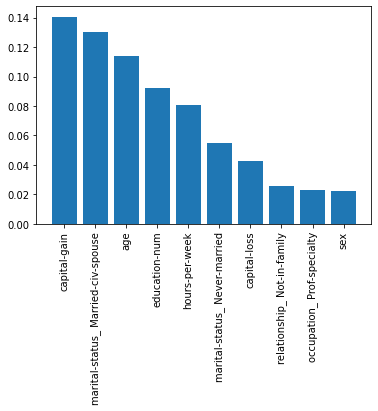

In [44]:
plt.bar(X_train.columns[ten_best_feats], ten_best_feat_importance)
plt.xticks(rotation='vertical')
plt.show()